In [1]:
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from scipy import stats

In [2]:
def percentage_formatter(x):
    return f'{round((x * 100), 2)}%'

In [5]:
frame = []
directory = 'correlations/V/metrics'

for filename in os.listdir(directory):
    if not filename.startswith('.'):
        file_path = os.path.join(directory, filename)
        file = pd.read_csv(file_path, delimiter=',', header=0, index_col=0)
        frame.append(file)
df = pd.concat(frame, axis=0, ignore_index=True)
df = df.reset_index(drop=True)

if os.path.exists('correlations/V/merged'):
    df.to_csv('correlations/V/merged/output.csv')
else:
    os.makedirs('correlations/V/merged')
    df.to_csv('correlations/V/merged/output.csv')

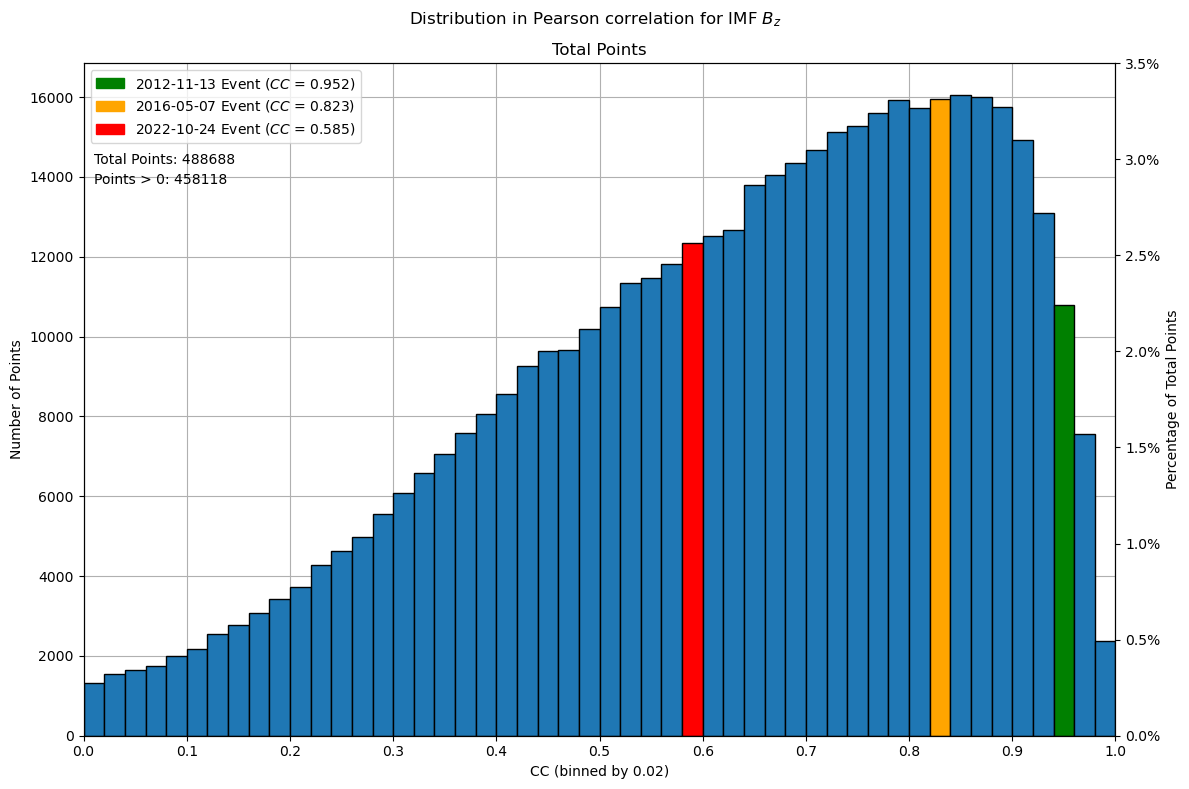

In [202]:
from matplotlib.patches import Patch

label_dict = {
    'BX_GSM': r'$B_x\ [nT]_{GSM}$',
    'BY_GSM': r'$B_y\ [nT]_{GSM}$',
    'BZ_GSM': r'$B_z\ [nT]_{GSM}$',
    'Vx': r'$V_x\ [nT]_{GSM}$',
    'Vy': r'$V_y\ [nT]_{GSM}$',
    'Vz': r'$V_z\ [nT]_{GSM}$',
    'proton_density': r'$Density\ [n/cm^3]$',
    'T': r'$Temp.\ [K]$'
}

metric_data = pd.read_csv('../Ordinary Solar Wind/correlations/Bz/merged/output.csv', delimiter=',', header=0)
event_date = pd.to_datetime(metric_data['Start'][0], format='%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')

header_name = 'Pearson'
selected_metric = metric_data['Pearson']

# Correlation Histograms -----------------------------------------------------------------------------------------------
pearson_correlation_bins = np.arange(0, 1.02, 0.02)
# Divide the heights by the total number of points in each dataset
total_points = len(selected_metric)

#ighlight_values = {0.952: 'green', 0.823: 'yellow', 0.585: 'orange'}
#default_color = 'C0'

# Create histogram
fig, ax1 = plt.subplots(1, 1, figsize=(12,8), sharex=True)
n, bins, patches = ax1.hist(selected_metric, pearson_correlation_bins, edgecolor='black', histtype='bar', color='C0', label='Total')

highlight_values = {
    0.952: ('green', r'2012-11-13 Event ($\it{CC}$ = 0.952)'),
    0.823: ('orange', '2016-05-07 Event ($\it{CC}$ = 0.823)'),
    0.585: ('red', '2022-10-24 Event ($\it{CC}$ = 0.585)')
}

patches_labels = []
for value, (color, label) in highlight_values.items():
    bin_index = np.digitize(value, bins) - 1
    patches[bin_index].set_facecolor(color)
    patches_labels.append(Patch(color=color, label=label))

ax1.legend(handles=patches_labels, loc='upper left')


ax1.set(ylabel="Number of Points", title='Total Points')
ax1.set_xlim(0,1)

# Calculate total points greater than 0 and less than 0
total_greater_than_zero = np.sum(selected_metric > 0)
total_less_than_zero = np.sum(selected_metric < 0)
total_points = len(selected_metric)


ax2 = ax1.twinx()
ax2.set_ylabel('Percentage of Total Points')
# Calculate the corresponding percentage values for the bins
max_count = np.max(n)
percentage_step = 0.5  # Set the percentage step for the ticks
max_percentage = np.ceil(max_count * 100 / total_points / percentage_step) * percentage_step
percentage_ticks = np.arange(0, max_percentage + percentage_step, percentage_step)
# Set ticks and labels for the secondary y-axis
ax2.set_ylim(0, max_percentage)
ax2.set_yticks(percentage_ticks)
ax2.set_yticklabels([f'{round(tick, 2)}%' for tick in percentage_ticks])


# Display total points under the legend
ax1.text(0.01, 0.85, f'Total Points: {total_points}', transform=ax1.transAxes, ha='left')
ax1.text(0.01, 0.82, f'Points > 0: {int(np.sum(n))}', transform=ax1.transAxes, ha='left')


ax1.grid(visible=True, which='both', axis='both')
ax1.set_axisbelow(True)

ax1.set_xlabel('CC (binned by 0.02)')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.suptitle(r'Distribution in Pearson correlation for IMF $B_z$')
plt.tight_layout()
plt.savefig(f'../Ordinary Solar Wind/plots/distributions/Bz.png', dpi=300)
plt.show()
# ----------------------------------------------------------------------------------------------------------------------

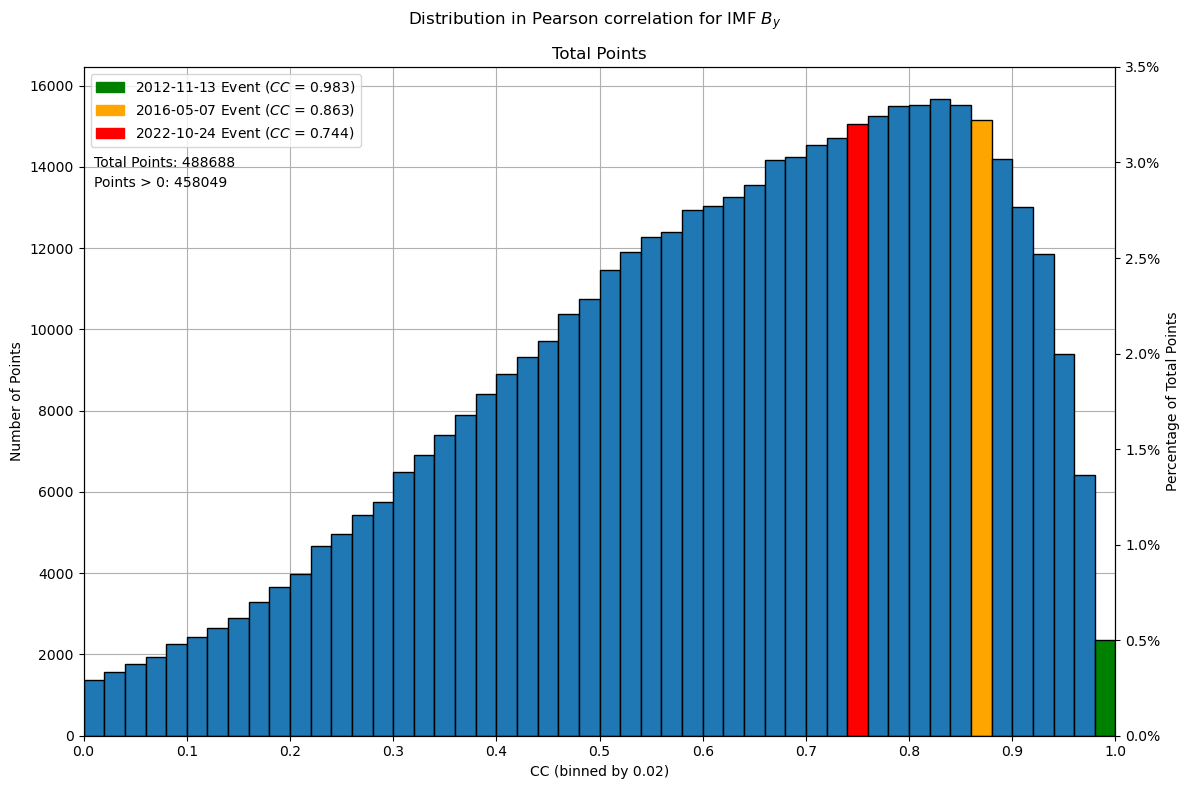

In [203]:
from matplotlib.patches import Patch

label_dict = {
    'BX_GSM': r'$B_x\ [nT]_{GSM}$',
    'BY_GSM': r'$B_y\ [nT]_{GSM}$',
    'BZ_GSM': r'$B_z\ [nT]_{GSM}$',
    'Vx': r'$V_x\ [nT]_{GSM}$',
    'Vy': r'$V_y\ [nT]_{GSM}$',
    'Vz': r'$V_z\ [nT]_{GSM}$',
    'proton_density': r'$Density\ [n/cm^3]$',
    'T': r'$Temp.\ [K]$'
}

metric_data = pd.read_csv('../Ordinary Solar Wind/correlations/By/merged/output.csv', delimiter=',', header=0)
event_date = pd.to_datetime(metric_data['Start'][0], format='%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')

header_name = 'Pearson'
selected_metric = metric_data['Pearson']

# Correlation Histograms -----------------------------------------------------------------------------------------------
pearson_correlation_bins = np.arange(0, 1.02, 0.02)
# Divide the heights by the total number of points in each dataset
total_points = len(selected_metric)

#ighlight_values = {0.952: 'green', 0.823: 'yellow', 0.585: 'orange'}
#default_color = 'C0'

# Create histogram
fig, ax1 = plt.subplots(1, 1, figsize=(12,8), sharex=True)
n, bins, patches = ax1.hist(selected_metric, pearson_correlation_bins, edgecolor='black', histtype='bar', color='C0', label='Total')


highlight_values = {
    0.983: ('green', r'2012-11-13 Event ($\it{CC}$ = 0.983)'),
    0.863: ('orange', '2016-05-07 Event ($\it{CC}$ = 0.863)'),
    0.744: ('red', '2022-10-24 Event ($\it{CC}$ = 0.744)')
}

patches_labels = []
for value, (color, label) in highlight_values.items():
    bin_index = np.digitize(value, bins) - 1
    patches[bin_index].set_facecolor(color)
    patches_labels.append(Patch(color=color, label=label))

ax1.legend(handles=patches_labels, loc='upper left')


ax1.set(ylabel="Number of Points", title='Total Points')
ax1.set_xlim(0,1)

# Calculate total points greater than 0 and less than 0
total_greater_than_zero = np.sum(selected_metric > 0)
total_less_than_zero = np.sum(selected_metric < 0)
total_points = len(selected_metric)


ax2 = ax1.twinx()
ax2.set_ylabel('Percentage of Total Points')
# Calculate the corresponding percentage values for the bins
max_count = np.max(n)
percentage_step = 0.5  # Set the percentage step for the ticks
max_percentage = np.ceil(max_count * 100 / total_points / percentage_step) * percentage_step
percentage_ticks = np.arange(0, max_percentage + percentage_step, percentage_step)
# Set ticks and labels for the secondary y-axis
ax2.set_ylim(0, max_percentage)
ax2.set_yticks(percentage_ticks)
ax2.set_yticklabels([f'{round(tick, 2)}%' for tick in percentage_ticks])


# Display total points under the legend
ax1.text(0.01, 0.85, f'Total Points: {total_points}', transform=ax1.transAxes, ha='left')
ax1.text(0.01, 0.82, f'Points > 0: {int(np.sum(n))}', transform=ax1.transAxes, ha='left')

ax1.grid(visible=True, which='both', axis='both')
ax1.set_axisbelow(True)

ax1.set_xlabel('CC (binned by 0.02)')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.suptitle(r'Distribution in Pearson correlation for IMF $B_y$')
plt.tight_layout()
plt.savefig(f'../Ordinary Solar Wind/plots/distributions/By.png', dpi=300)
plt.show()
# ----------------------------------------------------------------------------------------------------------------------

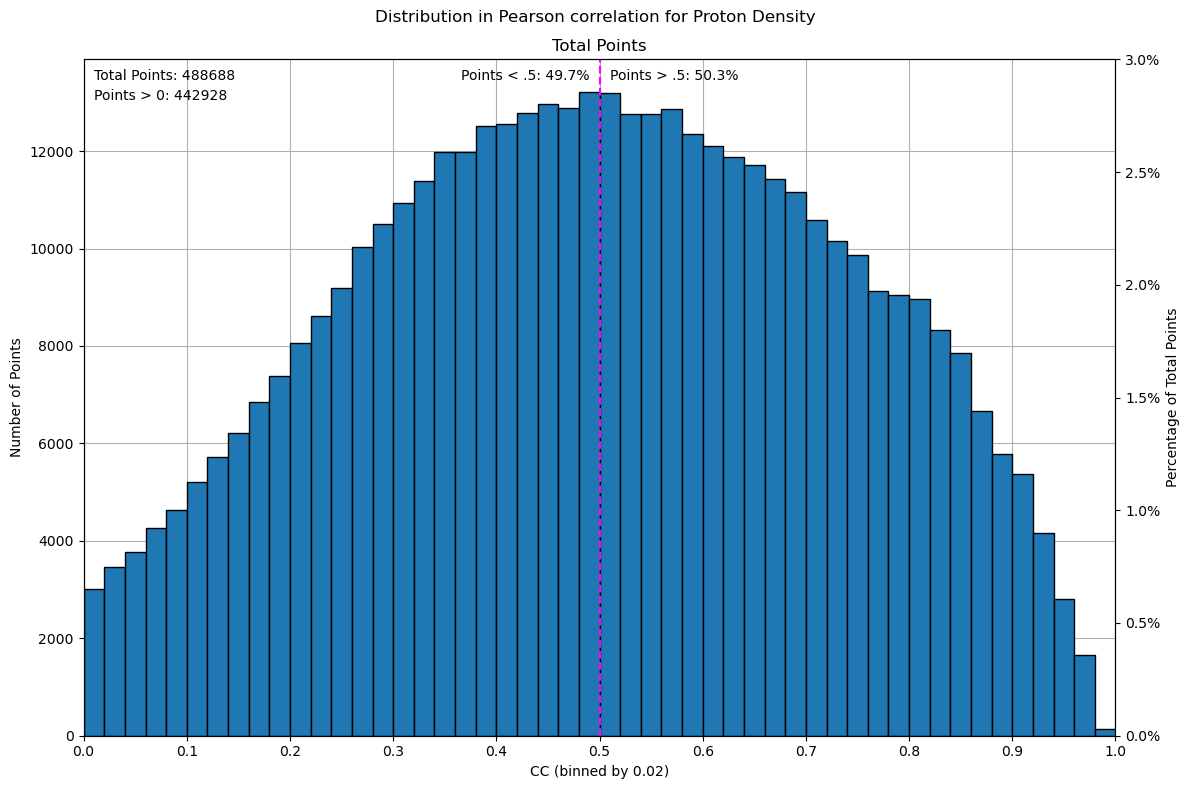

In [216]:
from matplotlib.patches import Patch

metric_data = pd.read_csv('correlations/N/merged/output.csv', delimiter=',', header=0)
event_date = pd.to_datetime(metric_data['Start'][0], format='%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')

header_name = 'Pearson'
selected_metric = metric_data['Pearson']

# Correlation Histograms -----------------------------------------------------------------------------------------------
pearson_correlation_bins = np.arange(0, 1.02, 0.02)
# Divide the heights by the total number of points in each dataset
total_points = len(selected_metric)

#ighlight_values = {0.952: 'green', 0.823: 'yellow', 0.585: 'orange'}
#default_color = 'C0'

# Create histogram
fig, ax1 = plt.subplots(1, 1, figsize=(12,8), sharex=True)
n, bins, patches = ax1.hist(selected_metric, pearson_correlation_bins, edgecolor='black', histtype='bar', color='C0', label='Total')
ax1.axvline(0.5, c='magenta', linestyle='dashed')

ax1.set(ylabel="Number of Points", title='Total Points')
ax1.set_xlim(0,1)

# Calculate total points greater than 0 and less than 0
total_greater_than_zero = np.sum(selected_metric > 0)
total_less_than_zero = np.sum(selected_metric < 0)
total_points = len(selected_metric)

ax2 = ax1.twinx()
ax2.set_ylabel('Percentage of Total Points')
# Calculate the corresponding percentage values for the bins
max_count = np.max(n)
percentage_step = 0.5  # Set the percentage step for the ticks
max_percentage = np.ceil(max_count * 100 / total_points / percentage_step) * percentage_step
percentage_ticks = np.arange(0, max_percentage + percentage_step, percentage_step)
# Set ticks and labels for the secondary y-axis
ax2.set_ylim(0, max_percentage)
ax2.set_yticks(percentage_ticks)
ax2.set_yticklabels([f'{round(tick, 2)}%' for tick in percentage_ticks])


# Display total points under the legend
ax1.text(0.01, 0.97, f'Total Points: {total_points}', transform=ax1.transAxes, ha='left')
ax1.text(0.01, 0.94, f'Points > 0: {int(np.sum(n))}', transform=ax1.transAxes, ha='left')

ax1.text(0.49, 0.97, f'Points < .5: {percentage_formatter((np.sum(n[0:25])/np.sum(n)))}', transform=ax1.transAxes, ha='right')
ax1.text(0.51, 0.97, f'Points > .5: {percentage_formatter((np.sum(n[25:50])/np.sum(n)))}', transform=ax1.transAxes, ha='left')

print()

ax1.grid(visible=True, which='both', axis='both')
ax1.set_axisbelow(True)

ax1.set_xlabel('CC (binned by 0.02)')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.suptitle(r'Distribution in Pearson correlation for Proton Density')
plt.tight_layout()
plt.savefig(f'plots/distributions/N.png', dpi=300)
plt.show()
# ----------------------------------------------------------------------------------------------------------------------

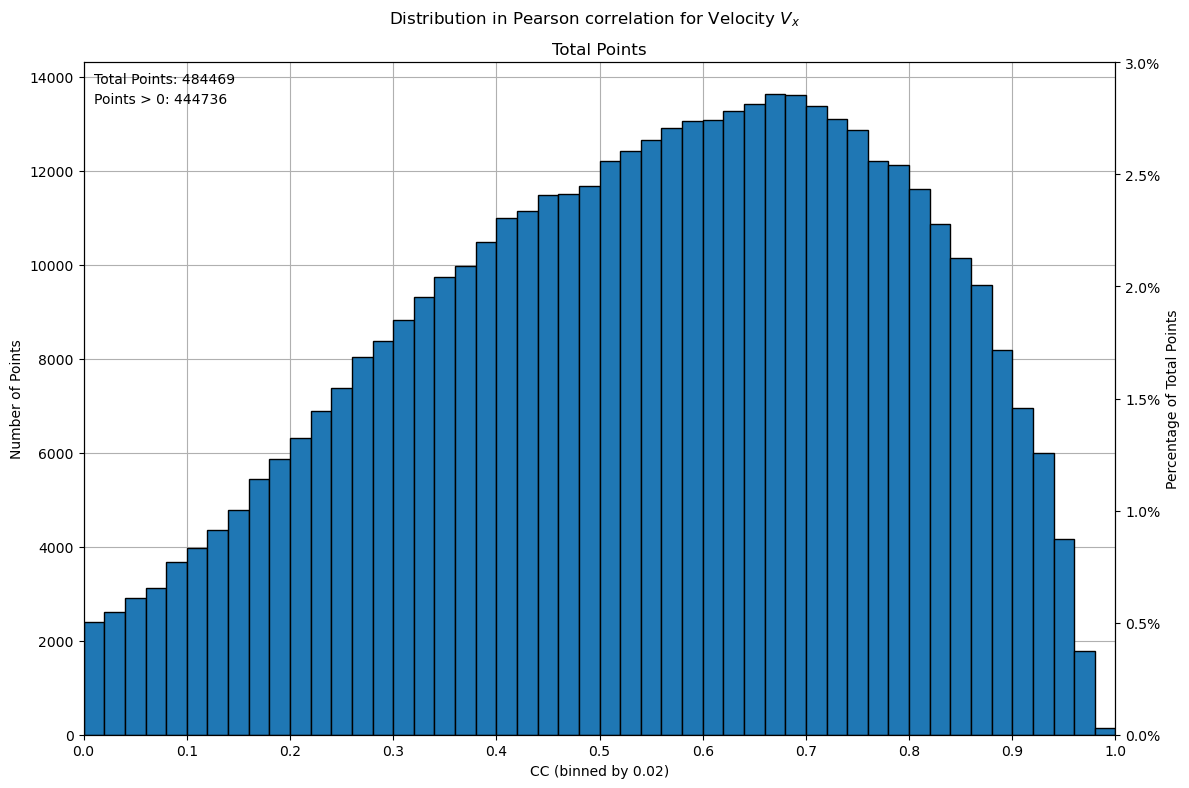

In [219]:
from matplotlib.patches import Patch

metric_data = pd.read_csv('correlations/VX/merged/output.csv', delimiter=',', header=0)
event_date = pd.to_datetime(metric_data['Start'][0], format='%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')

header_name = 'Pearson'
selected_metric = metric_data['Pearson']

# Correlation Histograms -----------------------------------------------------------------------------------------------
pearson_correlation_bins = np.arange(0, 1.02, 0.02)
# Divide the heights by the total number of points in each dataset
total_points = len(selected_metric)

#ighlight_values = {0.952: 'green', 0.823: 'yellow', 0.585: 'orange'}
#default_color = 'C0'

# Create histogram
fig, ax1 = plt.subplots(1, 1, figsize=(12,8), sharex=True)
n, bins, patches = ax1.hist(selected_metric, pearson_correlation_bins, edgecolor='black', histtype='bar', color='C0', label='Total')

ax1.set(ylabel="Number of Points", title='Total Points')
ax1.set_xlim(0,1)

# Calculate total points greater than 0 and less than 0
total_greater_than_zero = np.sum(selected_metric > 0)
total_less_than_zero = np.sum(selected_metric < 0)
total_points = len(selected_metric)

ax2 = ax1.twinx()
ax2.set_ylabel('Percentage of Total Points')
# Calculate the corresponding percentage values for the bins
max_count = np.max(n)
percentage_step = 0.5  # Set the percentage step for the ticks
max_percentage = np.ceil(max_count * 100 / total_points / percentage_step) * percentage_step
percentage_ticks = np.arange(0, max_percentage + percentage_step, percentage_step)
# Set ticks and labels for the secondary y-axis
ax2.set_ylim(0, max_percentage)
ax2.set_yticks(percentage_ticks)
ax2.set_yticklabels([f'{round(tick, 2)}%' for tick in percentage_ticks])


# Display total points under the legend
ax1.text(0.01, 0.97, f'Total Points: {total_points}', transform=ax1.transAxes, ha='left')
ax1.text(0.01, 0.94, f'Points > 0: {int(np.sum(n))}', transform=ax1.transAxes, ha='left')

print()

ax1.grid(visible=True, which='both', axis='both')
ax1.set_axisbelow(True)

ax1.set_xlabel('CC (binned by 0.02)')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.suptitle(r'Distribution in Pearson correlation for Velocity $V_x$')
plt.tight_layout()
plt.savefig(f'plots/distributions/Vx.png', dpi=300)
plt.show()
# ----------------------------------------------------------------------------------------------------------------------

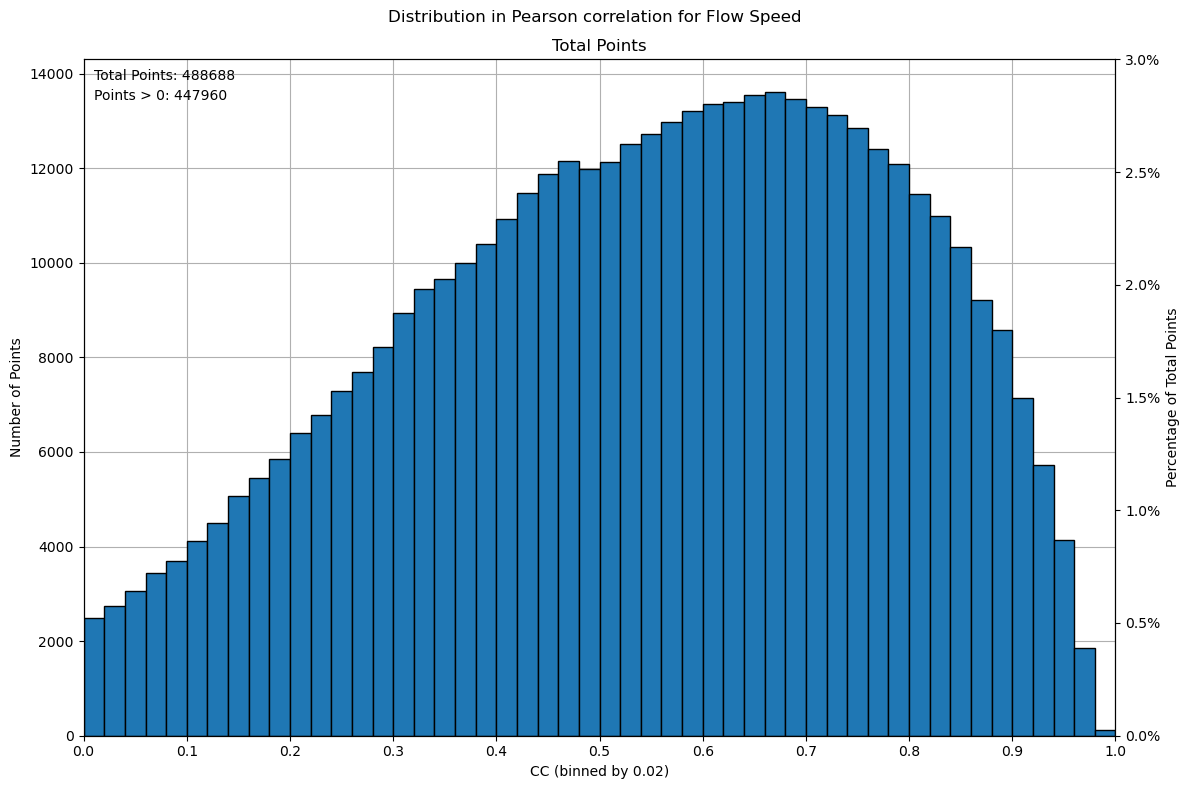

In [6]:
from matplotlib.patches import Patch

metric_data = pd.read_csv('correlations/V/merged/output.csv', delimiter=',', header=0)
event_date = pd.to_datetime(metric_data['Start'][0], format='%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')

header_name = 'Pearson'
selected_metric = metric_data['Pearson']

# Correlation Histograms -----------------------------------------------------------------------------------------------
pearson_correlation_bins = np.arange(0, 1.02, 0.02)
# Divide the heights by the total number of points in each dataset
total_points = len(selected_metric)

#ighlight_values = {0.952: 'green', 0.823: 'yellow', 0.585: 'orange'}
#default_color = 'C0'

# Create histogram
fig, ax1 = plt.subplots(1, 1, figsize=(12,8), sharex=True)
n, bins, patches = ax1.hist(selected_metric, pearson_correlation_bins, edgecolor='black', histtype='bar', color='C0', label='Total')

ax1.set(ylabel="Number of Points", title='Total Points')
ax1.set_xlim(0,1)

# Calculate total points greater than 0 and less than 0
total_greater_than_zero = np.sum(selected_metric > 0)
total_less_than_zero = np.sum(selected_metric < 0)
total_points = len(selected_metric)

ax2 = ax1.twinx()
ax2.set_ylabel('Percentage of Total Points')
# Calculate the corresponding percentage values for the bins
max_count = np.max(n)
percentage_step = 0.5  # Set the percentage step for the ticks
max_percentage = np.ceil(max_count * 100 / total_points / percentage_step) * percentage_step
percentage_ticks = np.arange(0, max_percentage + percentage_step, percentage_step)
# Set ticks and labels for the secondary y-axis
ax2.set_ylim(0, max_percentage)
ax2.set_yticks(percentage_ticks)
ax2.set_yticklabels([f'{round(tick, 2)}%' for tick in percentage_ticks])


# Display total points under the legend
ax1.text(0.01, 0.97, f'Total Points: {total_points}', transform=ax1.transAxes, ha='left')
ax1.text(0.01, 0.94, f'Points > 0: {int(np.sum(n))}', transform=ax1.transAxes, ha='left')

print()

ax1.grid(visible=True, which='both', axis='both')
ax1.set_axisbelow(True)

ax1.set_xlabel('CC (binned by 0.02)')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.suptitle(r'Distribution in Pearson correlation for Flow Speed')
plt.tight_layout()
plt.savefig(f'plots/distributions/Vtotal.png', dpi=300)
plt.show()
# ----------------------------------------------------------------------------------------------------------------------

In [149]:
metric_data_bz = pd.read_csv('/Volumes/Research/GITM Simulations/Ordinary Solar Wind/correlations/Bz/merged/output.csv', delimiter=',', header=0)
metric_data_by = pd.read_csv('/Volumes/Research/GITM Simulations/Ordinary Solar Wind/correlations/By/merged/output.csv', delimiter=',', header=0)

metric_data_bz['Start'] = pd.to_datetime(metric_data_bz['Start'])
metric_data_by['Start'] = pd.to_datetime(metric_data_by['Start'])

bounds = [(0.9, 0.92), (0.8, 0.82), (0.7, 0.72), (0.6, 0.62)]
filtered_corrs = {}

for b in bounds:
    timestamps = metric_data_bz[(metric_data_bz['Pearson'] > b[0]) & (metric_data_bz['Pearson'] < b[1])]['Start'].tolist()
    filtered_corrs[str(b[0])] = metric_data_by[metric_data_by['Start'].isin(timestamps)]['Pearson'].reset_index(drop=True)
    print(f"Bound {b}: {len(timestamps)} timestamps, {len(filtered_corrs[str(b[0])])} Pearson values")

Bound (0.9, 0.92): 14918 timestamps, 14918 Pearson values
Bound (0.8, 0.82): 15720 timestamps, 15720 Pearson values
Bound (0.7, 0.72): 14669 timestamps, 14669 Pearson values
Bound (0.6, 0.62): 12530 timestamps, 12530 Pearson values


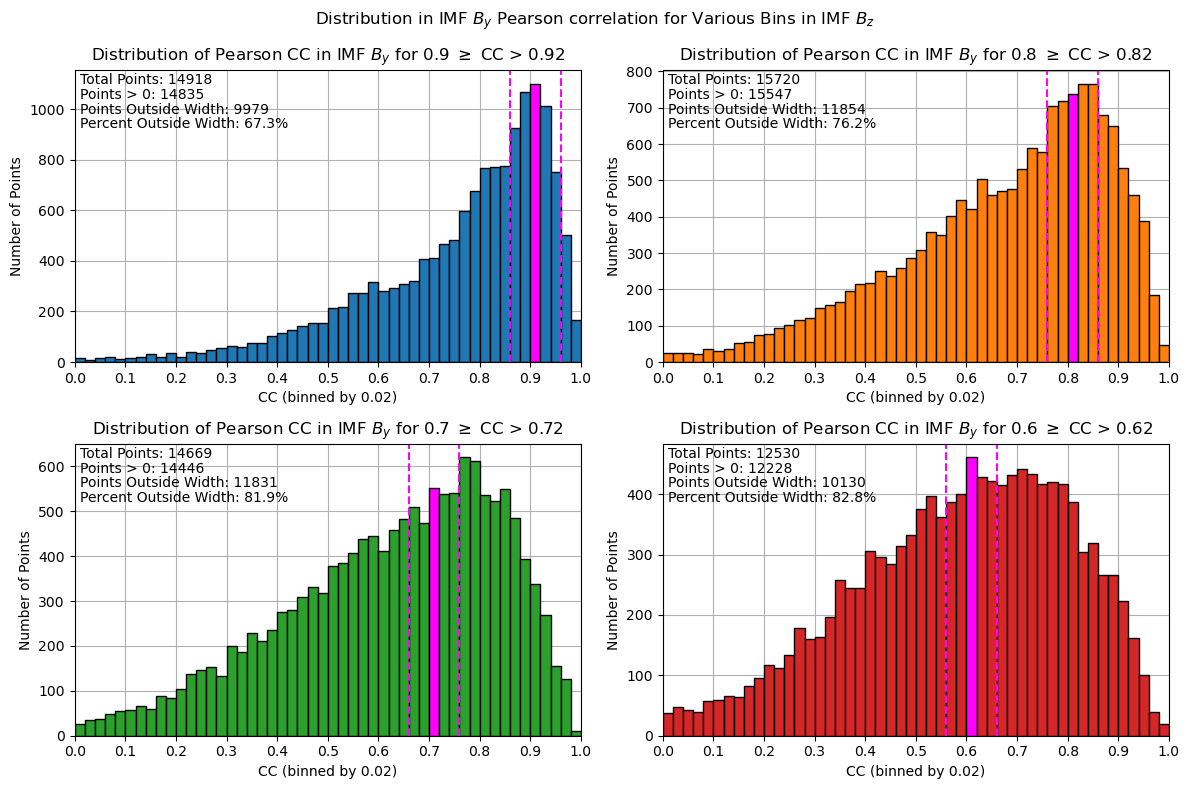

In [186]:
pearson_correlation_bins = np.arange(0, 1.02, 0.02)
bounds = [(0.9, 0.92), (0.8, 0.82), (0.7, 0.72), (0.6, 0.62)]

# Create histogram
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs = axs.flatten()
for i, (bound, values) in enumerate(filtered_corrs.items()):
    total_points = len(values)

    counts, bins, patches = axs[i].hist(values, pearson_correlation_bins, edgecolor='black', histtype='bar', color=f'C{i}')
    axs[i].axvline(round(float(bound), 2)-0.04, c='magenta', linestyle='dashed')
    axs[i].axvline(round(float(bound), 2)+0.06, c='magenta', linestyle='dashed')
    bin_index = int(round(float(bound), 2)*50)
    patches[bin_index].set_facecolor('magenta')

    axs[i].set(ylabel="Number of Points", xlabel='CC (binned by 0.02)', xlim=(0,1), title=rf'Distribution of Pearson CC in IMF $B_y$ for {round(float(bound), 2)} $\geq$ CC > {round(float(bound)+0.02, 2)}', axisbelow=True)
    axs[i].grid(visible=True, which='both', axis='both')
    axs[i].text(0.01, 0.95, f'Total Points: {total_points}', transform=axs[i].transAxes, ha='left')
    axs[i].text(0.01, 0.90, f'Points > 0: {int(np.sum(counts))}', transform=axs[i].transAxes, ha='left')
    axs[i].set_xticks(np.arange(0, 1.1, 0.1))

    lower = int(round(bounds[i][0]-0.04, 2)*50)
    upper = int(round(bounds[i][0]+0.06, 2)*50)
    points_outside = np.sum(counts[0:lower]) + np.sum(counts[upper:50])

    axs[i].text(0.01, 0.85, f'Points Outside Width: {int(points_outside)}', transform=axs[i].transAxes, ha='left')
    axs[i].text(0.01, 0.80, f'Percent Outside Width: {round(int(points_outside)/int(np.sum(counts))*100, 1)}%', transform=axs[i].transAxes, ha='left')



plt.suptitle(r'Distribution in IMF $B_y$ Pearson correlation for Various Bins in IMF $B_z$')
plt.tight_layout()
plt.savefig(f'plots/distributions/selectedhists.png', dpi=300)
plt.show()

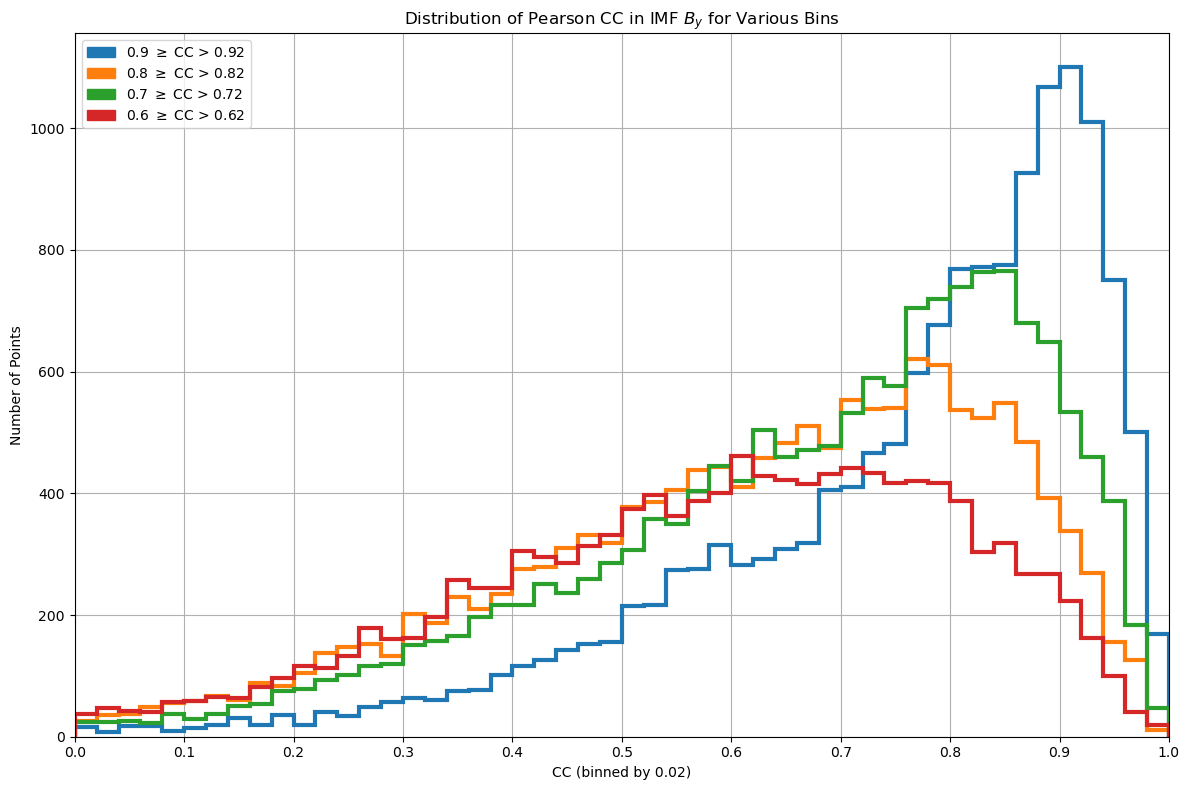

In [101]:
from matplotlib.patches import Patch

pearson_correlation_bins = np.arange(0, 1.02, 0.02)
# Divide the heights by the total number of points in each dataset
total_points = len(filtered_corrs)
patches_labels = []

highlight_values = [['C0', r'0.9 $\geq$ CC > 0.92'], ['C1', r'0.8 $\geq$ CC > 0.82'], ['C2', r'0.7 $\geq$ CC > 0.72'], ['C3', r'0.6 $\geq$ CC > 0.62']]

# Create histogram
fig, ax1 = plt.subplots(1, 1, figsize=(12,8), sharex=True)
for i, (bound, values) in enumerate(filtered_corrs.items()):
    n, bins, patches = ax1.hist(values, pearson_correlation_bins, histtype='step', linewidth=3)

ax1.set(ylabel="Number of Points", xlabel='CC (binned by 0.02)', title=r'Distribution of Pearson CC in IMF $B_y$ for Various Bins')
ax1.set_xlim(0,1)

for l in highlight_values:
    patches_labels.append(Patch(color=l[0], label=l[1]))
ax1.legend(handles=patches_labels, loc='upper left')

# Display total points under the legend
#ax1.text(0.01, 0.85, f'Total Points: {total_points}', transform=ax1.transAxes, ha='left')

ax1.grid(visible=True, which='both', axis='both')
ax1.set_axisbelow(True)

ax1.set_xlabel('CC (binned by 0.02)')
plt.xticks(np.arange(0, 1.1, 0.1))
#plt.suptitle(r'Distribution in Pearson correlation for IMF $B_y$')
plt.tight_layout()

plt.show()

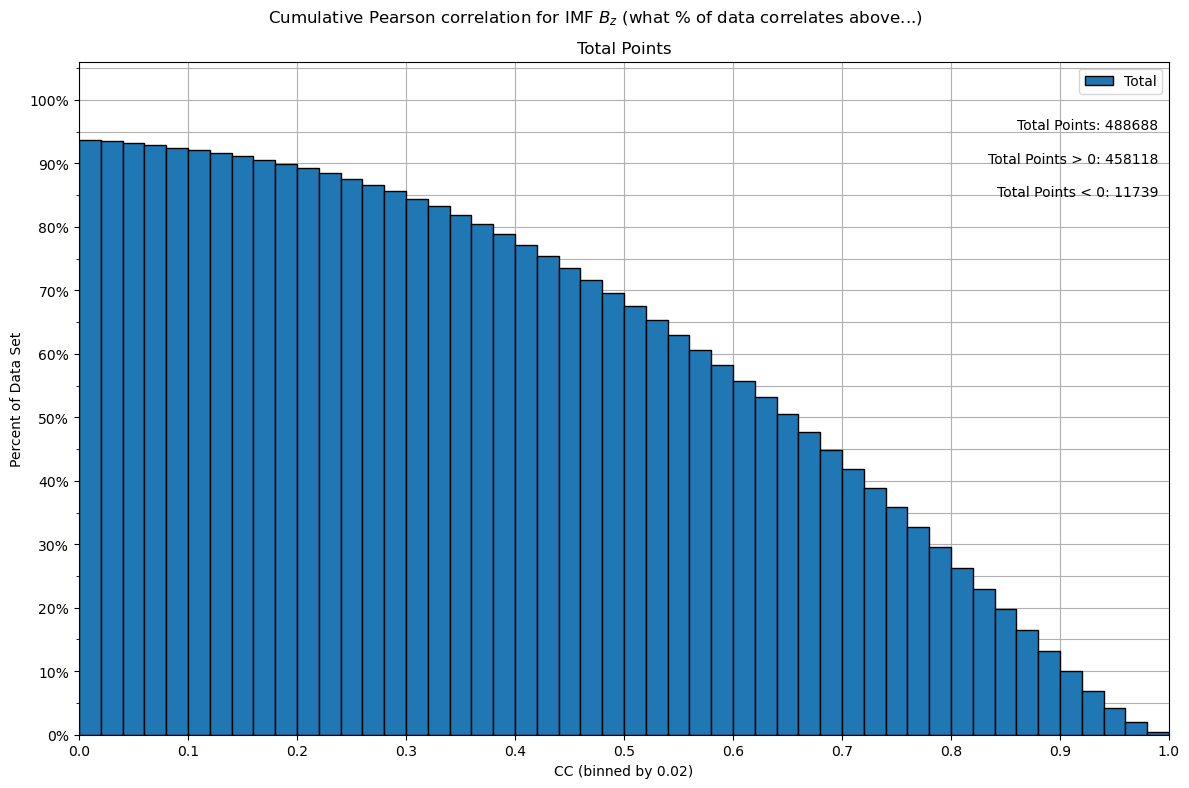

In [6]:
# Cumulative Histograms ------------------------------------------------------------------------------------------------
bins = np.arange(0, 1.02, 0.02)  # [0.0, 0.1, 0.2, ..., 1.0]
# Divide the heights by the total number of points in each dataset
total_points = len(selected_metric)

# Create histogram
fig, ax1 = plt.subplots(1, 1, figsize=(12,8), sharex=True)
ax1.hist(selected_metric, bins, weights=np.ones_like(selected_metric) / total_points, edgecolor='black', histtype='bar', color='C0', label='Total', cumulative=-1)

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(percentage_formatter))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

ax1.grid(visible=True, which='both', axis='both')
ax1.set_axisbelow(True)

ax1.set(ylabel="Percent of Data Set", title='Total Points', ylim=(0, 1.06))
ax1.legend(loc='upper right')
ax1.set_xlim(0,1)

for rect in ax1.patches:
    height = rect.get_height()
    count = rect.get_height() * total_points  # Calculate count of points in each rectangle
    #ax1.text(rect.get_x() + rect.get_width() / 2 - 0.045, height, f'{round(height * 100, 1)}%', ha='left',
            #va='bottom',  fontsize=8, rotation=45)
    #ax1.text(rect.get_x() + rect.get_width() / 2 + 0.045, height, f'({int(count)})', ha='right',
            #va='bottom', fontsize=6, rotation=45)

# Calculate total points greater than 0 and less than 0
total_greater_than_zero = np.sum(selected_metric > 0)
total_less_than_zero = np.sum(selected_metric < 0)
total_points = len(selected_metric)

# Display total points under the legend
ax1.text(0.99, 0.9, f'Total Points: {total_points}', transform=ax1.transAxes, ha='right')
ax1.text(0.99, 0.85, f'Total Points > 0: {total_greater_than_zero}', transform=ax1.transAxes, ha='right')
ax1.text(0.99, 0.8, f'Total Points < 0: {total_less_than_zero}', transform=ax1.transAxes, ha='right')

ax1.grid(visible=True, which='both', axis='both')
ax1.set_axisbelow(True)

plt.suptitle(r'Cumulative Pearson correlation for IMF $B_z$ (what % of data s above...)')

plt.xlabel('CC (binned by 0.02)')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.savefig(f'plots/new-data-plots/bar2-new.jpg', dpi=300)
plt.show()

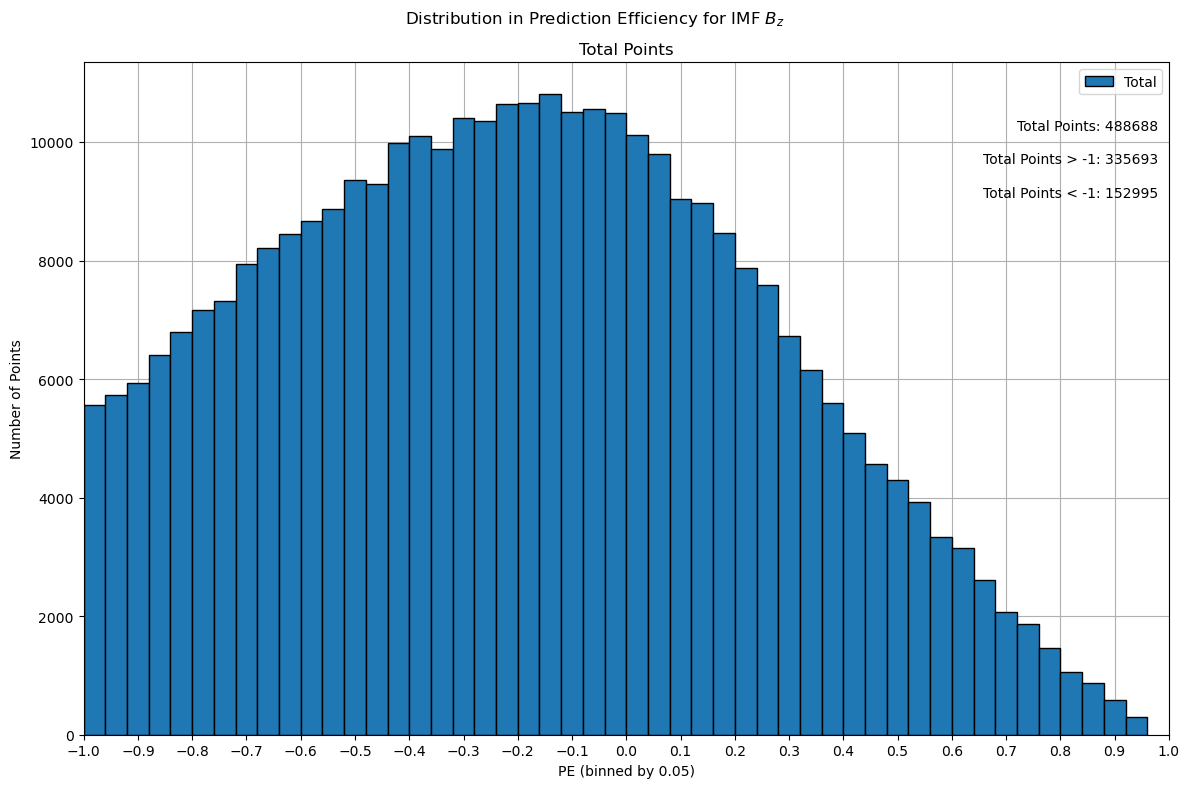

In [7]:
label_dict = {
    'BX_GSM': r'$B_x\ [nT]_{GSM}$',
    'BY_GSM': r'$B_y\ [nT]_{GSM}$',
    'BZ_GSM': r'$B_z\ [nT]_{GSM}$',
    'Vx': r'$V_x\ [nT]_{GSM}$',
    'Vy': r'$V_y\ [nT]_{GSM}$',
    'Vz': r'$V_z\ [nT]_{GSM}$',
    'proton_density': r'$Density\ [n/cm^3]$',
    'T': r'$Temp.\ [K]$'
}

metric_data = pd.read_csv('outputs/new-correlations-3/merged/output.csv', delimiter=',', header=0)
event_date = pd.to_datetime(metric_data['Start'][0], format='%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')

header_name = 'PE_Artemis'
selected_metric = metric_data['PE_Artemis']


# Correlation Histograms -----------------------------------------------------------------------------------------------
pearson_correlation_bins = np.arange(-1, 1, 0.04)
# Divide the heights by the total number of points in each dataset
total_points = len(selected_metric)

# Create histogram
fig, ax1 = plt.subplots(1, 1, figsize=(12,8), sharex=True)
ax1.hist(selected_metric, pearson_correlation_bins, edgecolor='black', histtype='bar', color='C0', label='Total')

ax1.set(ylabel="Number of Points", title='Total Points')
ax1.legend(loc='upper right')
ax1.set_xlim(-1,1)

# Calculate total points greater than 0 and less than 0
total_greater_than_zero = np.sum(selected_metric > -1)
total_less_than_zero = np.sum(selected_metric < -1)
total_points = len(selected_metric)

# Display total points under the legend
ax1.text(0.99, 0.9, f'Total Points: {total_points}', transform=ax1.transAxes, ha='right')
ax1.text(0.99, 0.85, f'Total Points > -1: {total_greater_than_zero}', transform=ax1.transAxes, ha='right')
ax1.text(0.99, 0.8, f'Total Points < -1: {total_less_than_zero}', transform=ax1.transAxes, ha='right')

ax1.grid(visible=True, which='both', axis='both')
ax1.set_axisbelow(True)

plt.xlabel('PE (binned by 0.05)')
plt.xticks(np.arange(-1, 1.1, 0.1))
plt.suptitle(r'Distribution in Prediction Efficiency for IMF $B_z$')
plt.tight_layout()
plt.savefig(f'plots/new-data-plots/bars-pe-artemis-new.jpg', dpi=300)
plt.show()
# ---------------------------------------------------------------------------------------------------------------------

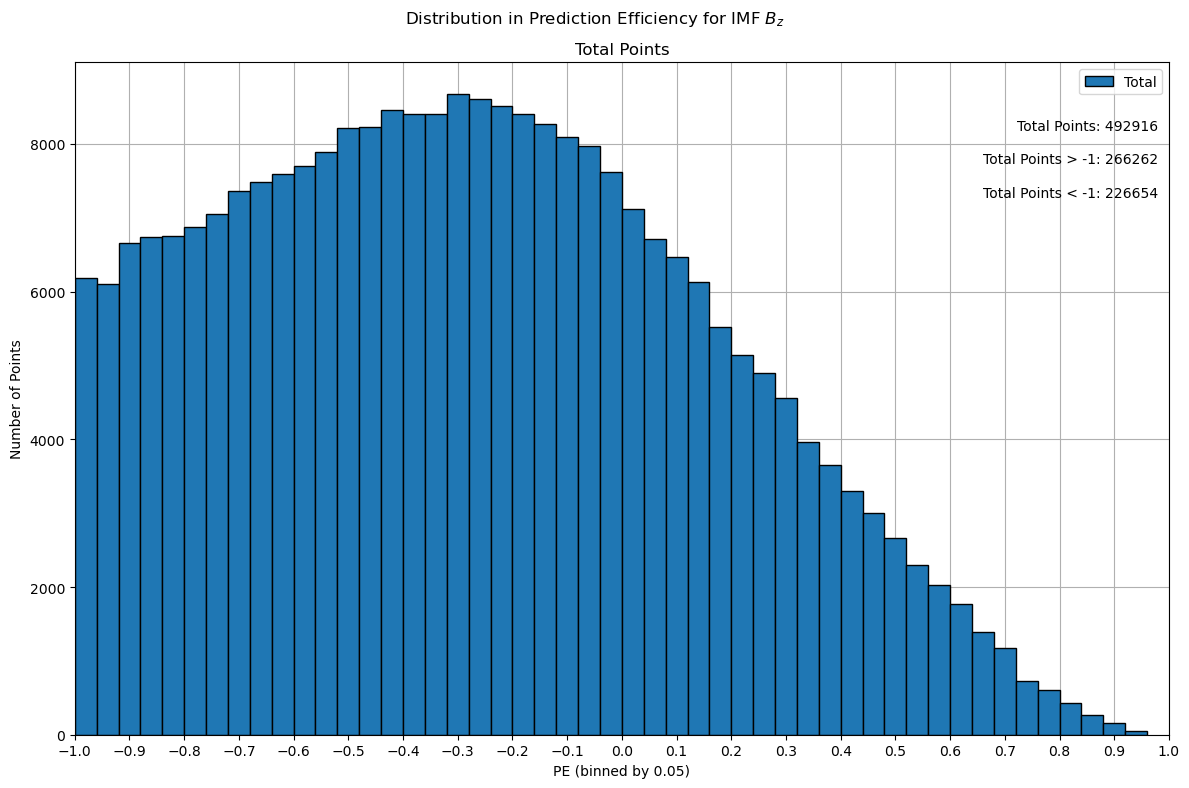

In [8]:
label_dict = {
    'BX_GSM': r'$B_x\ [nT]_{GSM}$',
    'BY_GSM': r'$B_y\ [nT]_{GSM}$',
    'BZ_GSM': r'$B_z\ [nT]_{GSM}$',
    'Vx': r'$V_x\ [nT]_{GSM}$',
    'Vy': r'$V_y\ [nT]_{GSM}$',
    'Vz': r'$V_z\ [nT]_{GSM}$',
    'proton_density': r'$Density\ [n/cm^3]$',
    'T': r'$Temp.\ [K]$'
}

metric_data = pd.read_csv('outputs/new-correlations-2/merged/output.csv', delimiter=',', header=0)
event_date = pd.to_datetime(metric_data['Start'][0], format='%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')

header_name = 'PE_Omni'
selected_metric = metric_data['PE_Omni']


# Correlation Histograms -----------------------------------------------------------------------------------------------
pearson_correlation_bins = np.arange(-1, 1, 0.04)
# Divide the heights by the total number of points in each dataset
total_points = len(selected_metric)

# Create histogram
fig, ax1 = plt.subplots(1, 1, figsize=(12,8), sharex=True)
ax1.hist(selected_metric, pearson_correlation_bins, edgecolor='black', histtype='bar', color='C0', label='Total')

ax1.set(ylabel="Number of Points", title='Total Points')
ax1.legend(loc='upper right')
ax1.set_xlim(-1,1)

# Calculate total points greater than 0 and less than 0
total_greater_than_zero = np.sum(selected_metric > -1)
total_less_than_zero = np.sum(selected_metric < -1)
total_points = len(selected_metric)

# Display total points under the legend
ax1.text(0.99, 0.9, f'Total Points: {total_points}', transform=ax1.transAxes, ha='right')
ax1.text(0.99, 0.85, f'Total Points > -1: {total_greater_than_zero}', transform=ax1.transAxes, ha='right')
ax1.text(0.99, 0.8, f'Total Points < -1: {total_less_than_zero}', transform=ax1.transAxes, ha='right')

ax1.grid(visible=True, which='both', axis='both')
ax1.set_axisbelow(True)

plt.xlabel('PE (binned by 0.05)')
plt.xticks(np.arange(-1, 1.1, 0.1))
plt.suptitle(r'Distribution in Prediction Efficiency for IMF $B_z$')
plt.tight_layout()
plt.savefig(f'plots/new-data-plots/bars-pe-omni-new.jpg', dpi=300)
plt.show()
# ---------------------------------------------------------------------------------------------------------------------

In [197]:
import os
import pandas as pd

# Replace these with the paths to your folders
folder1 = 'correlations/Bz/metrics'
folder2 = 'correlations/N/metrics'

# Get list of files in each folder and sort them by filename (date order)
files1 = sorted(os.listdir(folder1))
files2 = sorted(os.listdir(folder2))

# Find common, missing in folder1, and missing in folder2 files
common_files = sorted(set(files1).intersection(files2))
missing_in_folder1 = sorted(set(files2) - set(files1))
missing_in_folder2 = sorted(set(files1) - set(files2))

# Print missing files
if missing_in_folder1:
    print("Files missing in folder1:")
    for filename in missing_in_folder1:
        print(filename)

if missing_in_folder2:
    print("Files missing in folder2:")
    for filename in missing_in_folder2:
        print(filename)

# Check the length of each common file
i = 0
for filename in common_files:
    file1_path = os.path.join(folder1, filename)
    file2_path = os.path.join(folder2, filename)

    # Load each file as a dataframe
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

    # Compare the number of rows
    if len(df1) != len(df2):
        print(f"File {filename} has different lengths: {len(df1)} (folder1) vs {len(df2)} (folder2)!")
    else:
        print(f"File {filename} is the same length.")
    i += 1

print(f"{i} files parsed.")

Files missing in folder1:
2017-11-17.csv
File 2012-01-22.csv is the same length.
File 2012-02-21.csv is the same length.
File 2012-03-21.csv is the same length.
File 2012-04-20.csv is the same length.
File 2012-05-20.csv is the same length.
File 2012-06-18.csv is the same length.
File 2012-07-18.csv is the same length.
File 2012-08-16.csv is the same length.
File 2012-09-15.csv is the same length.
File 2012-10-15.csv is the same length.
File 2012-11-13.csv is the same length.
File 2012-12-12.csv is the same length.
File 2013-01-11.csv is the same length.
File 2013-02-09.csv is the same length.
File 2013-03-11.csv is the same length.
File 2013-04-09.csv is the same length.
File 2013-05-09.csv is the same length.
File 2013-06-07.csv is the same length.
File 2013-07-07.csv is the same length.
File 2013-08-06.csv is the same length.
File 2013-09-04.csv is the same length.
File 2013-10-04.csv is the same length.
File 2013-11-02.csv is the same length.
File 2013-12-02.csv is the same length.

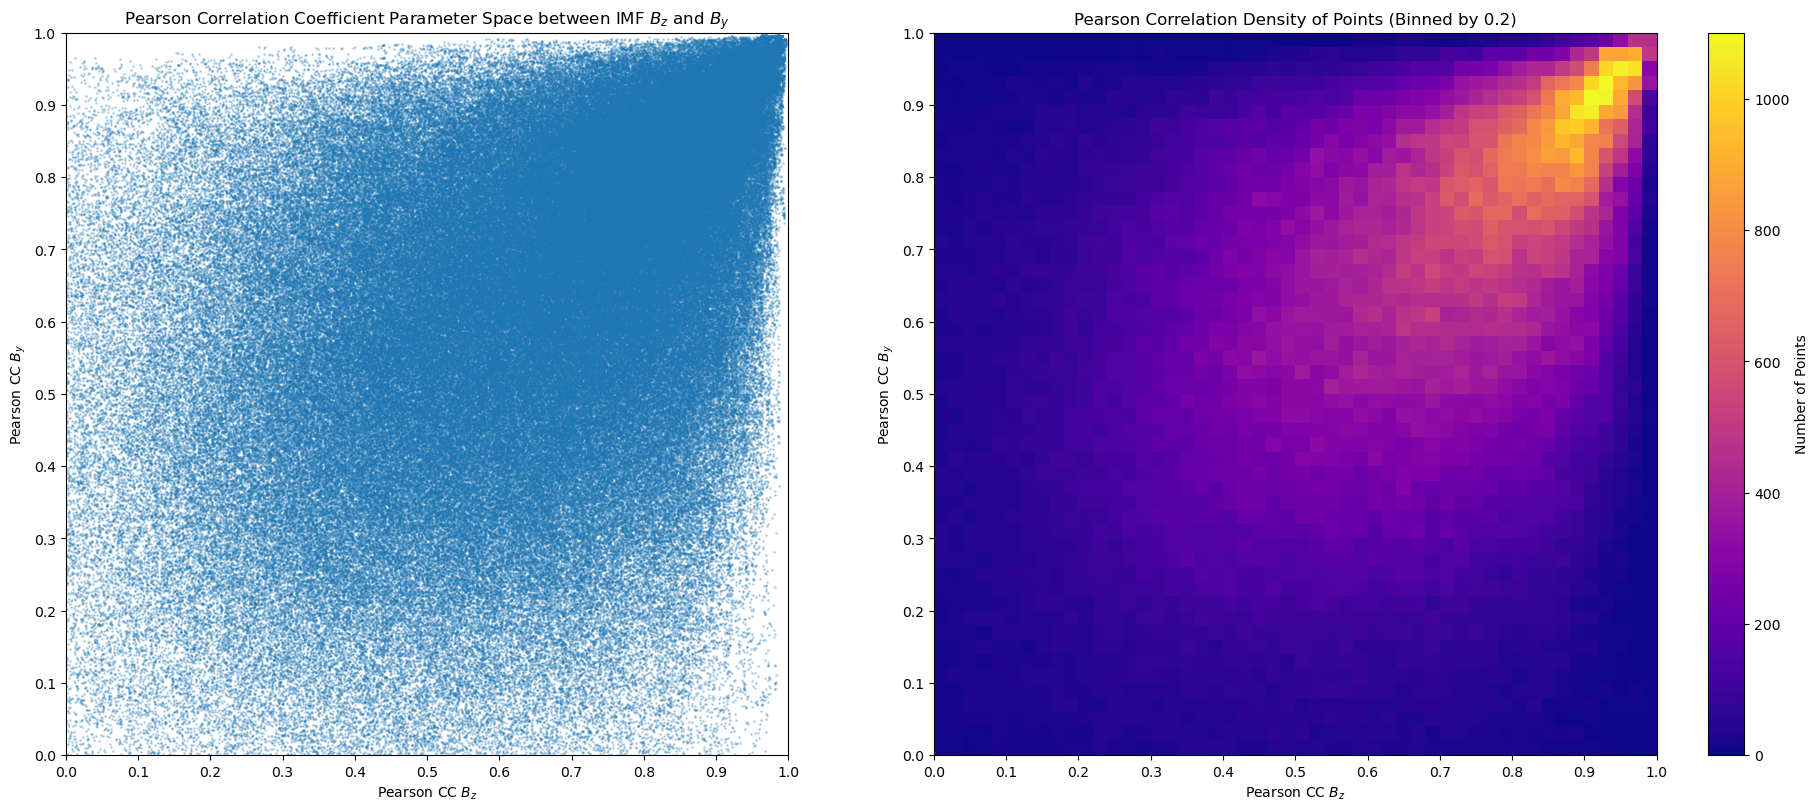

In [192]:
metric_data_bz = pd.read_csv('correlations/Bz/merged/output.csv', delimiter=',', header=0)
metric_data_by = pd.read_csv('correlations/By/merged/output.csv', delimiter=',', header=0)

selected_metric_bz = metric_data_bz['Pearson']
selected_metric_by = metric_data_by['Pearson']

# Enable constrained layout for automatic adjustments
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), constrained_layout=True)

# Scatter plot
ax1.scatter(selected_metric_bz, selected_metric_by, s=1, alpha=0.25)
ax1.set(
    xlabel=r'Pearson CC $B_z$',
    ylabel=r'Pearson CC $B_y$',
    title=r'Pearson Correlation Coefficient Parameter Space between IMF $B_z$ and $B_y$',
    xlim=(0, 1),
    ylim=(0, 1),
    xticks = np.arange(0, 1.1, 0.1),
    yticks = np.arange(0, 1.1, 0.1)
)

ax1.set_box_aspect(1)

# 2D histogram with colorbar
toplot, x_edges, y_edges, im = ax2.hist2d(selected_metric_bz, selected_metric_by, bins=[pearson_correlation_bins, pearson_correlation_bins], cmap='plasma')
cb = fig.colorbar(im, ax=ax2)
cb.set_label('Number of Points')

ax2.set(
    xlabel=r'Pearson CC $B_z$',
    ylabel=r'Pearson CC $B_y$',
    title=r'Pearson Correlation Density of Points (Binned by 0.2)',
    xlim=(0, 1),
    ylim=(0, 1),
    xticks = np.arange(0, 1.1, 0.1),
    yticks = np.arange(0, 1.1, 0.1)
)
ax2.set_box_aspect(1)
ax2.grid(visible=True, which='both', axis='both')
ax2.set_axisbelow(True)

# Save and show the plot
plt.savefig(f'plots/distributions/2Dhist.png', dpi=300)
plt.show()

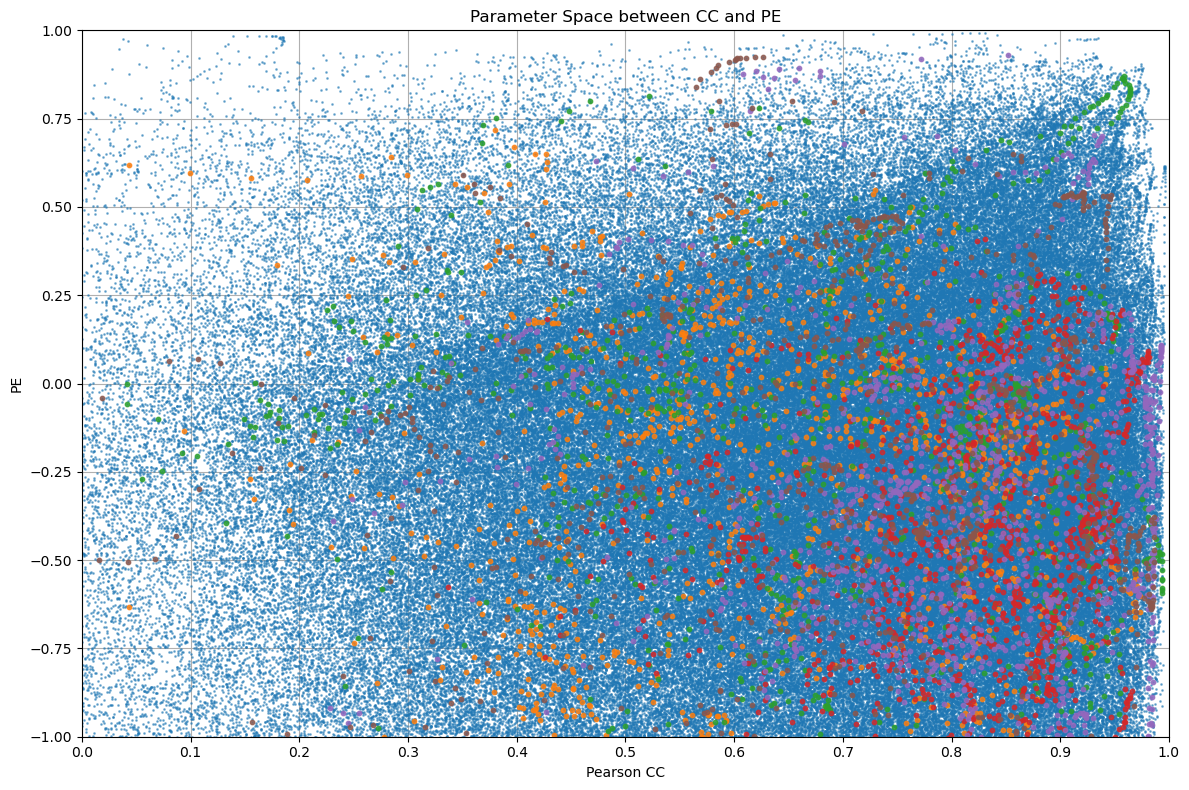

In [15]:
metric_data = pd.read_csv('outputs/new-correlations-3/merged/output.csv', delimiter=',', header=0)
metric_data['Start'] = pd.to_datetime(metric_data['Start'], format='%Y-%m-%d %H:%M:%S')
metric_data['Stop'] = pd.to_datetime(metric_data['Stop'], format='%Y-%m-%d %H:%M:%S')

event_date = metric_data['Start'][0].strftime('%Y-%m-%d')

header_x_name = 'Pearson'
selected_x_metric = metric_data['Pearson']

header_y_name = 'PE_Artemis'
selected_y_metric = metric_data['PE_Artemis']

# Create scatter plot
fig, ax1 = plt.subplots(1, 1, figsize=(12,8), sharex=True)

ax1.scatter(selected_x_metric, selected_y_metric, s=1, alpha=0.5)


# Filter the points that lie within the datetime range
highlighted_points_1 = metric_data[(metric_data['Start'] >= dt.datetime(2022, 5, 1, 0, 0)) & (metric_data['Stop'] <= dt.datetime(2022, 5, 1, 23, 59))]

highlighted_points_2 = metric_data[(metric_data['Start'] >= dt.datetime(2016, 5, 6, 12, 0)) & (metric_data['Stop'] <= dt.datetime(2016, 5, 7, 12, 0))]

highlighted_points_3 = metric_data[(metric_data['Start'] >= dt.datetime(2015, 10, 12, 0, 0)) & (metric_data['Stop'] <= dt.datetime(2015, 10, 12, 23, 59))]

highlighted_points_4 = metric_data[(metric_data['Start'] >= dt.datetime(2018, 2, 16, 0, 0)) & (metric_data['Stop'] <= dt.datetime(2018, 2, 16, 23, 59))]

highlighted_points_5 = metric_data[(metric_data['Start'] >= dt.datetime(2020, 5, 21, 12, 0)) & (metric_data['Stop'] <= dt.datetime(2020, 5, 22, 12, 0))]

ax1.scatter(highlighted_points_1[header_x_name], highlighted_points_1[header_y_name], s=10, color='C1', alpha=0.8, label='Highlighted Points')
ax1.scatter(highlighted_points_2[header_x_name], highlighted_points_2[header_y_name], s=10, color='C2', alpha=0.8, label='Highlighted Points')
ax1.scatter(highlighted_points_3[header_x_name], highlighted_points_3[header_y_name], s=10, color='C3', alpha=0.8, label='Highlighted Points')
ax1.scatter(highlighted_points_4[header_x_name], highlighted_points_4[header_y_name], s=10, color='C4', alpha=0.8, label='Highlighted Points')
ax1.scatter(highlighted_points_5[header_x_name], highlighted_points_5[header_y_name], s=10, color='C5', alpha=0.8, label='Highlighted Points')

ax1.set(xlabel='Pearson CC', ylabel="PE", title='Parameter Space between CC and PE', xlim=(0,1), ylim=(-1,1))

ax1.grid(visible=True, which='both', axis='both')
ax1.set_axisbelow(True)

plt.xticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
#plt.savefig(f'bars-pe.jpg', dpi=300)
plt.show()
# ---------------------------------------------------------------------------------------------------------------------